In [77]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# importing the data set
df = pd.read_csv("adult_dataset.csv")

# Data Exploratory

In [79]:
# checking the head of dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [80]:
# let's see the shape of our dataset
df.shape

(32561, 15)

In [81]:
# checking some more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [82]:
# Statistical information about the data
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###  dealing with categorical and  invalid format features

In [83]:
# counting the number of the missing values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### as we can see, there are no missing values in our dataset.
### but if we take a look at the head of our data set, we observe "?" in some columns which are indeed considered as missing values

In [85]:
# filtering the "?" in the "workclass" column
df1  = df[df.workclass == "?"]
# counting the number of rows with "?" values
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
age               1836 non-null int64
workclass         1836 non-null object
fnlwgt            1836 non-null int64
education         1836 non-null object
education.num     1836 non-null int64
marital.status    1836 non-null object
occupation        1836 non-null object
relationship      1836 non-null object
race              1836 non-null object
sex               1836 non-null object
capital.gain      1836 non-null int64
capital.loss      1836 non-null int64
hours.per.week    1836 non-null int64
native.country    1836 non-null object
income            1836 non-null object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


There are 1836 rows with missing values, which is about 5% of the total data. We choose to simply drop these rows.

In [86]:
# removing the "?" values from "workclass" column
df = df[df['workclass'] != "?"]
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [10]:
# let's again see the shape of our dataset
df.shape

(30725, 15)

Let's see whether any other columns contain a "?". Since "?" is a string, we can apply this check only on the categorical columns.

In [87]:
# select all categorical variables
cat_data = df.select_dtypes(include=["object"])

In [88]:
# checking whether any other columns contain a "?"
cat_data.apply(lambda x:x=="?").sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

The columns occupation and native.country contain some "?"s. Let's remove them.

In [89]:
# dropping the "?"s
df = df[df['native.country'] != "?"]
df = df[df['occupation'] != "?"]

In [14]:
# shape
df.shape

(30162, 15)

### Encode categorical variables using Label Encoder

In [90]:
# select all categorical variables
df_categorical = df.select_dtypes(include=["object"])

In [91]:
# apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_categorical = df_categorical.apply(encoder.fit_transform)

In [92]:
# looking at the head of encoded data
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [93]:
# droping the categorical columns from our main df
df = df.drop(df_categorical.columns, axis=1)

In [20]:
#head
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
1,82,132870,9,0,4356,18
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
5,34,216864,9,0,3770,45
6,38,150601,6,0,3770,40


In [94]:
# concat df_categorical with original df
df = pd.concat([df, df_categorical], axis = 1)

In [95]:
#head
df.head(3)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0


In [96]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int64
education         30162 non-null int64
marital.status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
race              30162 non-null int64
sex               30162 non-null int64
native.country    30162 non-null int64
income            30162 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [97]:
# convert target variable income to categorical
df['income'] = df['income'].astype("category")

# Spliting the dataset into training and test set

In [98]:
# defining the dep. and indep. variables
x = df.drop("income", axis = 1)
y = df["income"]

In [100]:
# Splitting the data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)

# Model Building

In [101]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# buidling the the decision tree model with default hyperparameters
clf = DecisionTreeClassifier(random_state=44)

In [102]:
# fitting the data into the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=44,
            splitter='best')

# Model Evaluation

In [103]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, average_precision_score

In [104]:
# let's check the accurcy of our traing set
accuracy_score(y_train, clf.predict(X_train))

1.0

In [105]:
# printing classification report
print(classification_report(y_train, clf.predict(X_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     15787
          1       1.00      1.00      1.00      5326

avg / total       1.00      1.00      1.00     21113



In [106]:
# confusion matrix
confusion_matrix(y_train, clf.predict(X_train))

array([[15787,     0],
       [    0,  5326]], dtype=int64)

# 100% accuracy!!! we can clearly observe there is something wrong with our model

In [109]:
# predicting the unseen data
y_pred = clf.predict(X_test)

In [110]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.8093712012377058

In [111]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[5948,  919],
       [ 806, 1376]], dtype=int64)

In [112]:
# classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87      6867
          1       0.60      0.63      0.61      2182

avg / total       0.81      0.81      0.81      9049



# Thus, it is clear that the model is overfitting the training data if hyperparameters are set too default. 

# Hyperparameter Tuning
The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

# Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.


In [116]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [117]:
# scores of GridSearch CV
scores = tree.cv_results_

In [118]:
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.02808,0.00624,0.747738,0.747738,1,{'max_depth': 1},39,0.747633,0.747765,0.747810,...,0.747750,0.747735,0.747750,0.747735,0.747750,0.747735,1.167403e-02,0.007642,0.000058,0.000014
1,0.04056,0.00312,0.819969,0.819969,2,{'max_depth': 2},16,0.812027,0.821955,0.818849,...,0.820464,0.819845,0.825675,0.818542,0.822833,0.819253,7.642372e-03,0.006240,0.004590,0.001148
2,0.05616,0.00312,0.834273,0.834510,3,{'max_depth': 3},12,0.828362,0.836047,0.834478,...,0.834439,0.834468,0.836570,0.833758,0.837518,0.833758,7.642430e-03,0.006240,0.003188,0.000836
3,0.06864,0.00000,0.840193,0.842088,4,{'max_depth': 4},9,0.832386,0.841672,0.841108,...,0.842492,0.845006,0.842729,0.838908,0.842255,0.845421,7.642313e-03,0.000000,0.003944,0.002719
4,0.07800,0.00624,0.843888,0.846386,5,{'max_depth': 5},7,0.834044,0.844337,0.847975,...,0.847229,0.849328,0.842729,0.841572,0.847466,0.849683,9.536743e-08,0.007642,0.005272,0.003075


Now let's visualize how train and test score changes with max_depth.

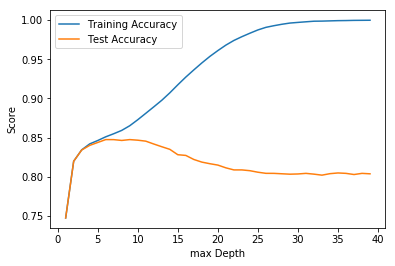

In [119]:
# plotting accuracies with max_depth
plt.plot(scores['param_max_depth'], scores["mean_train_score"], label="Training Accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="Test Accuracy")
plt.xlabel("max Depth")
plt.ylabel("Score")
plt.legend()

You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

# now, let's retrain our model with the max_depth of 5 and see how our model behaves

In [129]:
# building the model
clr2 = DecisionTreeClassifier(max_depth=5, random_state=100)
# fitting the data
clr2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [130]:
# checking the training accuracy
accuracy_score(y_train, clr2.predict(X_train))

0.8474399658977881

In [131]:
# confusion matrix
confusion_matrix(y_train, clr2.predict(X_train))

array([[15057,   730],
       [ 2491,  2835]], dtype=int64)

In [132]:
# classification report
print(classification_report(y_train, clr2.predict(X_train)))

             precision    recall  f1-score   support

          0       0.86      0.95      0.90     15787
          1       0.80      0.53      0.64      5326

avg / total       0.84      0.85      0.84     21113



# we can observe that our model is not anymore overfitting.

In [133]:
# predicting the test dataset with our new model
y_pred2 = clr2.predict(X_test)

In [134]:
# accuracy score
accuracy_score(y_test, y_pred)

0.8093712012377058

In [135]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[5948,  919],
       [ 806, 1376]], dtype=int64)